# Prepare scVelo objects for RNA velocity analysis
This notebook includes preparation of RNA velocity analysis using scVelo done in the axolotl pallium project.

Loading packages

In [1]:
# data management
import pandas as pd
from scipy.io import mmread
from scipy.io import mmwrite
import scanpy as sc
import anndata as ad
import pickle
import numpy as np

# analysis
import scvelo as scv
import cellrank as cr

scv.settings.set_figure_params("scvelo")
ncores = 32

This is a function to read in the data for each sample

In [2]:
def createAnnDataVelo(path, cells, suffix = ""):
    # adapted from https://github.com/theislab/anndata/issues/190
    cellnames = pd.read_csv(path+"/unspliced.barcodes.txt", header=None).iloc[:,0].values
    genenames = pd.read_csv(path+"/unspliced.genes.txt", header=None).iloc[:,0].values
    sdata = ad.read_mtx(path+"/unspliced.mtx")
    sdata.obs_names = cellnames+suffix
    sdata.var_names = genenames
    sdata.layers['spliced'] = sdata.X
    sdata = sdata[cells+suffix,:]
    
    cellnames = pd.read_csv(path+"/spliced.barcodes.txt", header=None).iloc[:,0].values
    genenames = pd.read_csv(path+"/spliced.genes.txt", header=None).iloc[:,0].values
    ndata = ad.read_mtx(path+"/spliced.mtx")
    ndata.obs_names = cellnames+suffix
    ndata.var_names = genenames
    sdata.layers['unspliced'] = ndata[cells+suffix,:].X
    
    sdata.X = sdata.layers['spliced']+sdata.layers['unspliced']
    
    return sdata

Read in metadata

In [3]:
#pal_meta = pd.read_csv("../data/annotations/pallium_meta_velocity.csv", index_col=0)
div_meta = pd.read_csv("../data/annotations/divseq_meta_velocity.csv", index_col=0)

#pal_meta["newcellnames"] = pal_meta["cells"]+"_"+pal_meta["sample"]
#pal_meta.index = pal_meta["newcellnames"]
div_meta["newcellnames"] = div_meta["cells"]+"_"+div_meta["sample"]
div_meta.index = div_meta["newcellnames"]

Read in spliced/unspliced data

In [4]:
original_dir = "/links/groups/treutlein/USERS/tomasgomes/data/axolotl/RNAvelocity/"
samples_ss = {"D_1": "D1", "D_2": "D2", 
              "L_1": "L1", "L_2": "L2", 
              "M_1": "M1", "M_2": "M2", 
              "a1_1_GEX": "a1_1", "a1_2_GEX": "a1_2", 
              "a3_1_GEX": "a3_1", "a3_2_GEX": "a3_2"}
samples_div = {"1_wpi_Edu_pos": "1_wpi_pos", "2_wpi_v2": "2_wpi", "4_wpi": "4_wpi", 
               "6_wpi": "6_wpi", "8_wpi_v2": "8_wpi", "12_wpi": "12_wpi"}

#ann_ss_dic = {x: createAnnDataVelo(original_dir+x, pal_meta.loc[pal_meta["sample"]==samples_ss[x],"cells"].values, "_"+samples_ss[x]) for x in samples_ss.keys()}
ann_div_dic = {x: createAnnDataVelo(original_dir+x,  div_meta.loc[div_meta["sample"]==samples_div[x],"cells"].values, "_"+samples_div[x]) for x in samples_div.keys()}

Merge objects

In [5]:
#pal_data = ad.concat(ann_ss_dic)
#pal_data.obs = pal_meta.loc[pal_data.obs.index.values,:]
#pal_data.obsm["X_umap"] = pal_meta.loc[pal_data.obs.index.values,["UMAP_1", "UMAP_2"]].values

div_data = ad.concat(ann_div_dic)
div_data.obs = div_meta
div_data.obsm["X_umap"] = div_meta.loc[:,["UMAP_1", "UMAP_2"]].values

Save compiled data

In [6]:
#pal_data.var["gene"] = pal_data.var.index.values
#pal_data.var["gene"] = pal_data.var["gene"].astype(str)
#pal_data.var.index = pal_data.var["gene"].values
#pal_data.obs = pal_data.obs.loc[:,pal_data.obs.columns.values!="newcellnames"]
#pal_data.write_h5ad("../data/processed/velocity_results/pal_data_raw.h5ad")

div_data.var["gene"] = div_data.var.index.values
div_data.var["gene"] = div_data.var["gene"].astype(str)
div_data.var.index = div_data.var["gene"].values
div_data.obs = div_data.obs.loc[:,div_data.obs.columns.values!="newcellnames"]
div_data.write_h5ad("../data/processed/velocity_results/div_data_raw.h5ad")

... storing 'cells' as categorical
... storing 'high_level_anno' as categorical
... storing 'sample' as categorical
... storing 'batch' as categorical


Spliced/unspliced proportions

/home/tpires/bin/miniconda3/envs/scgen-env/lib/python3.9/site-packages/scvelo/plotting/proportions.py:87: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  pie = ax.pie(


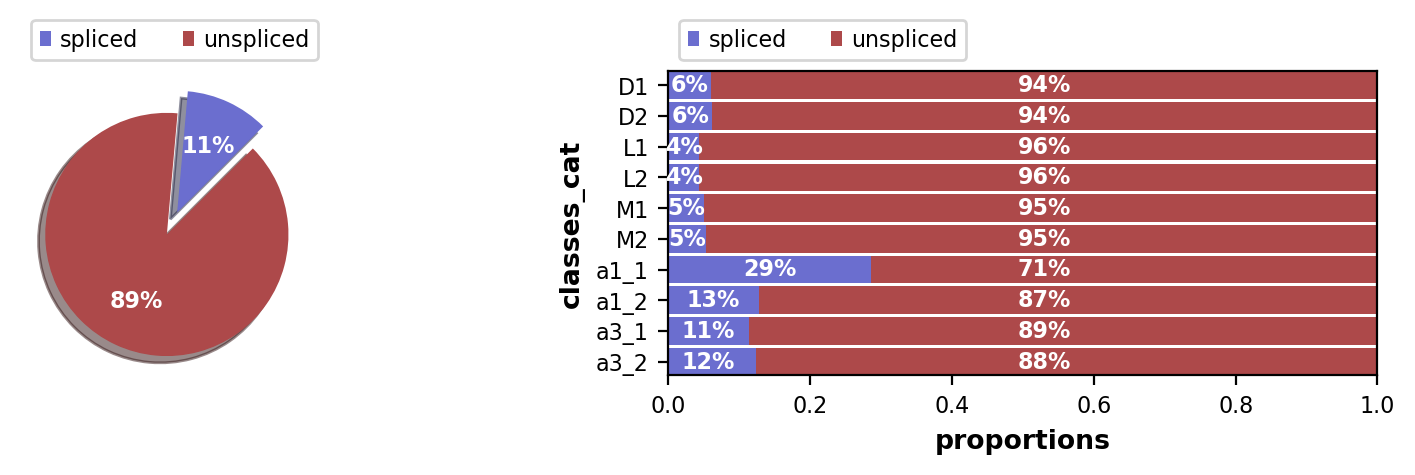

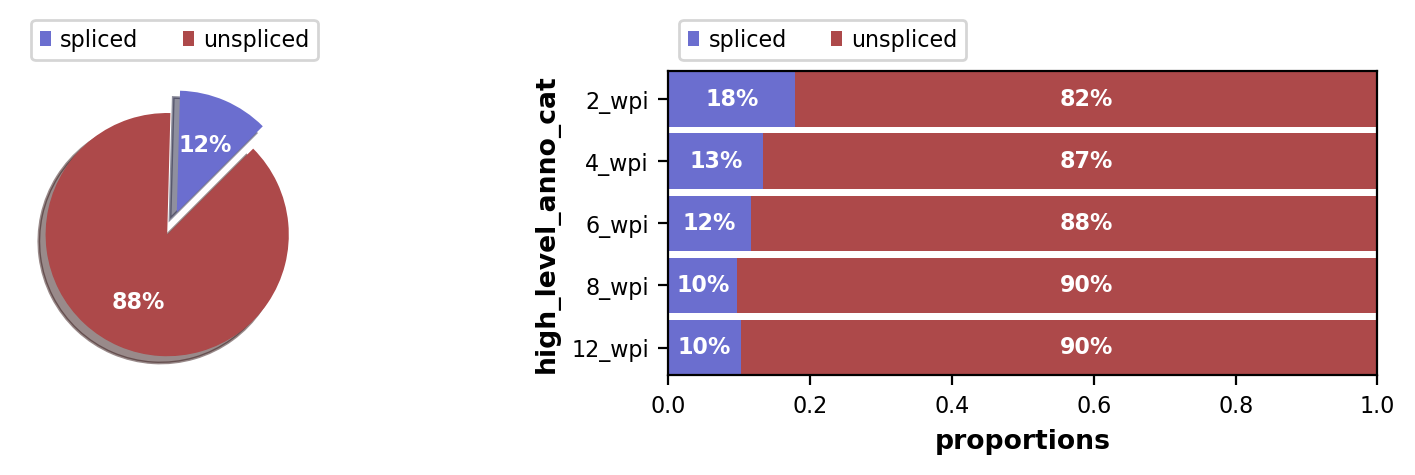

In [13]:
pal_data.obs["classes_cat"] = pd.Categorical(pal_data.obs["sample"])
scv.pl.proportions(pal_data, groupby='classes_cat')

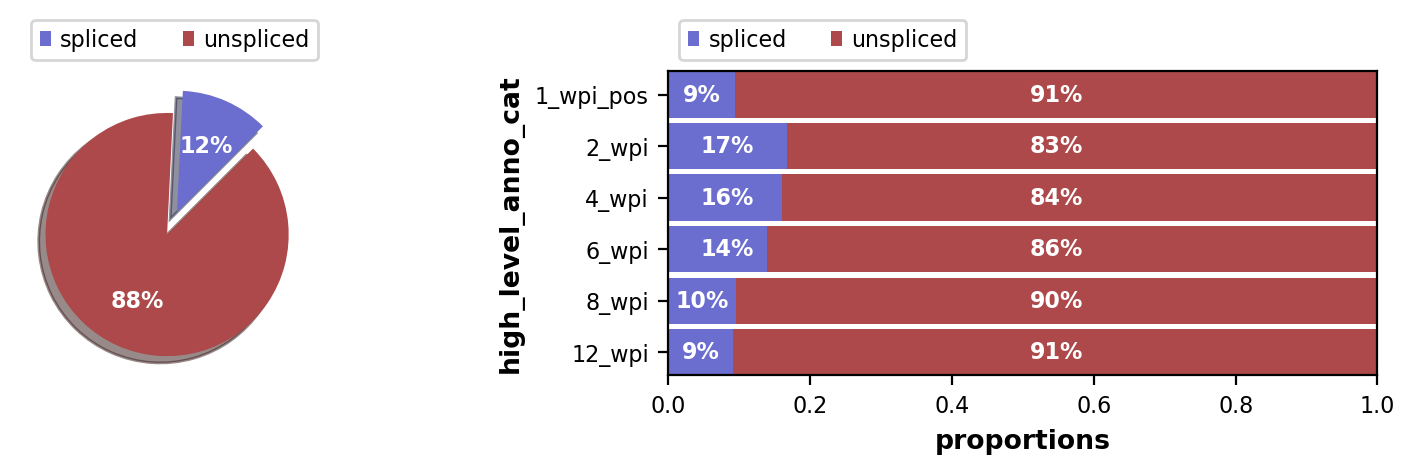

In [7]:
div_data.obs["high_level_anno_cat"] = pd.Categorical(div_data.obs["sample"])
scv.pl.proportions(div_data, groupby='high_level_anno_cat')